In [1]:
from SystExplorer import SystExplorer
import uproot

import os
import re
import numpy as np
import pandas as pd
# import seaborn as sns
from matplotlib import pyplot as plt

# sns.set(rc={'figure.figsize':(13.7,8.27)})

### **datacard systematics**

In [2]:
# explorer = SystExplorer('/nfs/dust/cms/user/cardinia/HtoTauTau/HiggsCP/Combine/CMSSW_10_2_13/src/CombineHarvester/HTTSMCPDecays18/shapes/DESY/2018/htt_et.inputs-sm-13TeV-mergeXbins.root')

In [3]:
explorer = SystExplorer('/nfs/dust/cms/user/cardinia/HtoTauTau/HiggsCP/Combine/CMSSW_10_2_13/src/CombineHarvester/HTTSMCPDecays18/output/etau_Sep4/htt_bkg_et/common/htt_input.root')

In [4]:
explorer.print_file_content()

htt_et_2016_1_13TeV
htt_et_2016_2_13TeV
htt_et_2017_1_13TeV
htt_et_2017_2_13TeV
htt_et_2018_1_13TeV
htt_et_2018_2_13TeV


In [14]:
explorer.print_category_content('htt_et_2018_2_13TeV')

data_obs
EmbedZTT
ZL
TTT
VVT
jetFakes
qqH_sm_htt125
qqH_ps_htt125
qqH_mm_htt125
WH_sm_htt125
WH_ps_htt125
WH_mm_htt125
ZH_sm_htt125
ZH_ps_htt125
ZH_mm_htt125
ggH_sm_htt125
ggH_ps_htt125
ggH_mm_htt125
qqH_sm_htt125_CMS_PS_FSR_VBFDown
qqH_sm_htt125_CMS_PS_FSR_VBFUp
qqH_ps_htt125_CMS_PS_FSR_VBFDown
qqH_ps_htt125_CMS_PS_FSR_VBFUp
qqH_mm_htt125_CMS_PS_FSR_VBFDown
qqH_mm_htt125_CMS_PS_FSR_VBFUp
ggH_sm_htt125_CMS_PS_FSR_ggHDown
ggH_sm_htt125_CMS_PS_FSR_ggHUp
ggH_ps_htt125_CMS_PS_FSR_ggHDown
ggH_ps_htt125_CMS_PS_FSR_ggHUp
ggH_mm_htt125_CMS_PS_FSR_ggHDown
ggH_mm_htt125_CMS_PS_FSR_ggHUp
qqH_sm_htt125_CMS_PS_ISR_VBFDown
qqH_sm_htt125_CMS_PS_ISR_VBFUp
qqH_ps_htt125_CMS_PS_ISR_VBFDown
qqH_ps_htt125_CMS_PS_ISR_VBFUp
qqH_mm_htt125_CMS_PS_ISR_VBFDown
qqH_mm_htt125_CMS_PS_ISR_VBFUp
ggH_sm_htt125_CMS_PS_ISR_ggHDown
ggH_sm_htt125_CMS_PS_ISR_ggHUp
ggH_ps_htt125_CMS_PS_ISR_ggHDown
ggH_ps_htt125_CMS_PS_ISR_ggHUp
ggH_mm_htt125_CMS_PS_ISR_ggHDown
ggH_mm_htt125_CMS_PS_ISR_ggHUp
ZL_CMS_efake_et_MVADM0Down
ZL_CM

In [6]:
explorer.print_category_summary('htt_et_2018_2_13TeV')

found these samples in htt_et_2018_2_13TeV category:
      * EmbedZTT
      * TTT
      * VVT
      * WH_mm_htt125
      * WH_ps_htt125
      * WH_sm_htt125
      * ZH_mm_htt125
      * ZH_ps_htt125
      * ZH_sm_htt125
      * ZL
      * data_obs
      * ggH_mm_htt125
      * ggH_ps_htt125
      * ggH_sm_htt125
      * jetFakes
      * qqH_mm_htt125
      * qqH_ps_htt125
      * qqH_sm_htt125

and these systematics:
      * CMS_PS_FSR_VBF
      * CMS_PS_FSR_ggH
      * CMS_PS_ISR_VBF
      * CMS_PS_ISR_ggH
      * CMS_efake_et_MVADM0
      * CMS_efake_et_MVADM1
      * CMS_efake_et_MVADM10
      * CMS_efake_et_MVADM2
      * CMS_eff_Xtrigger_et_MVADM0_2018
      * CMS_eff_Xtrigger_et_MVADM10_2018
      * CMS_eff_Xtrigger_et_MVADM1_2018
      * CMS_eff_Xtrigger_et_MVADM2_2018
      * CMS_eff_embedded_Xtrigger_et_MVADM0_2018
      * CMS_eff_embedded_Xtrigger_et_MVADM10_2018
      * CMS_eff_embedded_Xtrigger_et_MVADM1_2018
      * CMS_eff_embedded_Xtrigger_et_MVADM2_2018
      * CMS_eff_

In [9]:
year = 2018
channel = 'et'
decay_mode = None
category = 'fakes'
sample = 'jetFakes'
# systematic_name = 'ff_et_qcd_l_pt_closure_syst'

In [21]:
syst_list = [                       #'CMS_htt_et_2018_et_fakes_2018_EmbedZTT_bbb_bin_1',
#       'CMS_htt_et_2018_et_fakes_2018_EmbedZTT_bbb_bin_2',
#       'CMS_htt_et_2018_et_fakes_2018_EmbedZTT_bbb_bin_3',
#       'CMS_htt_et_2018_et_fakes_2018_EmbedZTT_bbb_bin_4',
#       'CMS_htt_et_2018_et_fakes_2018_EmbedZTT_bbb_bin_5',
#       'CMS_htt_et_2018_et_fakes_2018_ZL_bbb_bin_1',
#       'CMS_htt_et_2018_et_fakes_2018_ZL_bbb_bin_2',
#       'CMS_htt_et_2018_et_fakes_2018_ZL_bbb_bin_3',
#       'CMS_htt_et_2018_et_fakes_2018_ZL_bbb_bin_4',
#       'CMS_htt_et_2018_et_fakes_2018_ZL_bbb_bin_5',
#       'CMS_htt_et_2018_et_fakes_2018_ggH_bbb_bin_1',
#       'CMS_htt_et_2018_et_fakes_2018_ggH_bbb_bin_2',
#       'CMS_htt_et_2018_et_fakes_2018_ggH_bbb_bin_3',
#       'CMS_htt_et_2018_et_fakes_2018_ggH_bbb_bin_4',
#       'CMS_htt_et_2018_et_fakes_2018_ggH_bbb_bin_5',
      'CMS_htt_et_2018_et_fakes_2018_jetFakes_bbb_bin_1',
      'CMS_htt_et_2018_et_fakes_2018_jetFakes_bbb_bin_2',
      'CMS_htt_et_2018_et_fakes_2018_jetFakes_bbb_bin_3',
      'CMS_htt_et_2018_et_fakes_2018_jetFakes_bbb_bin_4',
      'CMS_htt_et_2018_et_fakes_2018_jetFakes_bbb_bin_5',
#       'CMS_htt_et_2018_et_fakes_2018_qqH_bbb_bin_1',
#       'CMS_htt_et_2018_et_fakes_2018_qqH_bbb_bin_2',
#       'CMS_htt_et_2018_et_fakes_2018_qqH_bbb_bin_3',
#       'CMS_htt_et_2018_et_fakes_2018_qqH_bbb_bin_4',
#       'CMS_htt_et_2018_et_fakes_2018_qqH_bbb_bin_5',
]



Looking into systematic: CMS_htt_et_2018_et_fakes_2018_jetFakes_bbb_bin_1
plotting up(down)/central ratio for jetFakes template in category: htt_et_2018_2_13TeV




Looking into systematic: CMS_htt_et_2018_et_fakes_2018_jetFakes_bbb_bin_2
plotting up(down)/central ratio for jetFakes template in category: htt_et_2018_2_13TeV




Looking into systematic: CMS_htt_et_2018_et_fakes_2018_jetFakes_bbb_bin_3
plotting up(down)/central ratio for jetFakes template in category: htt_et_2018_2_13TeV




Looking into systematic: CMS_htt_et_2018_et_fakes_2018_jetFakes_bbb_bin_4
plotting up(down)/central ratio for jetFakes template in category: htt_et_2018_2_13TeV




Looking into systematic: CMS_htt_et_2018_et_fakes_2018_jetFakes_bbb_bin_5
plotting up(down)/central ratio for jetFakes template in category: htt_et_2018_2_13TeV




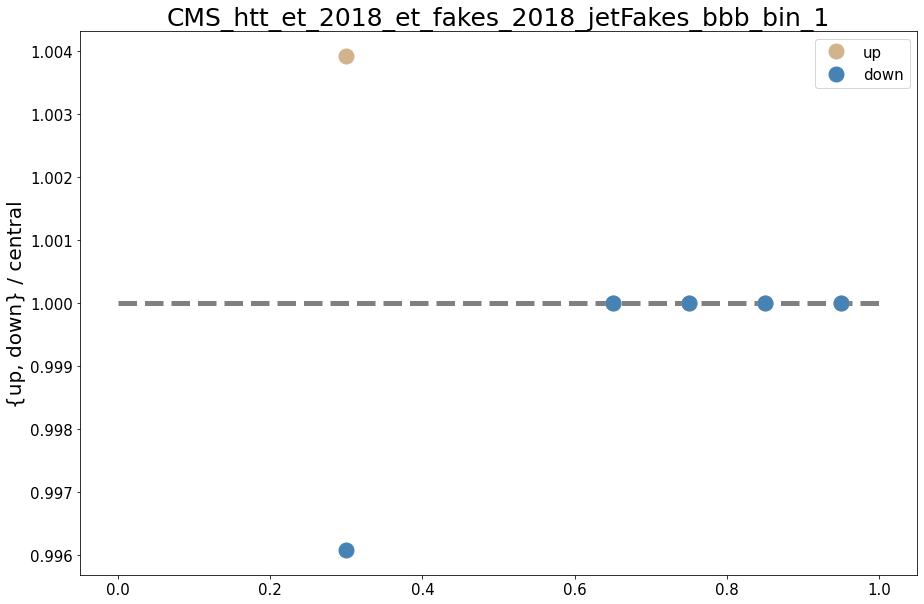

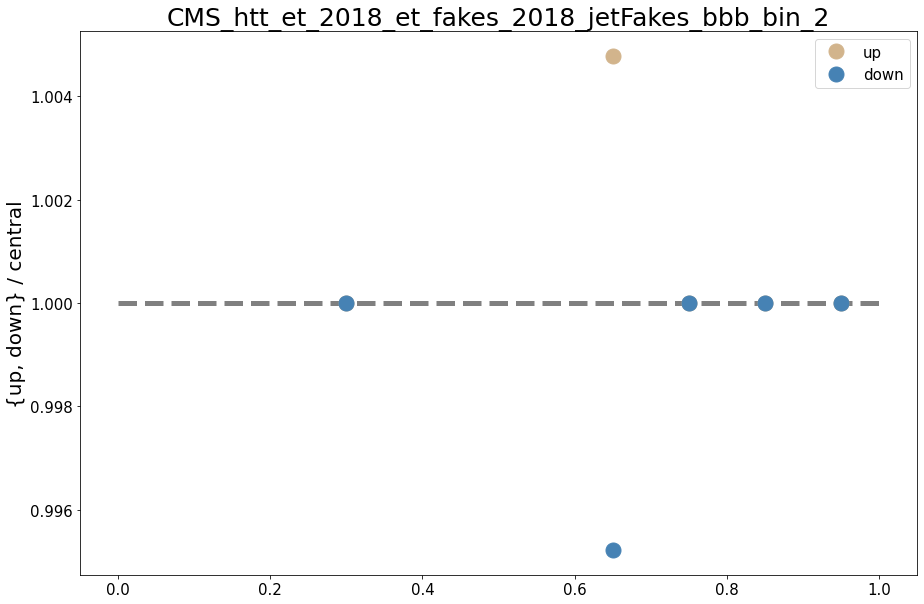

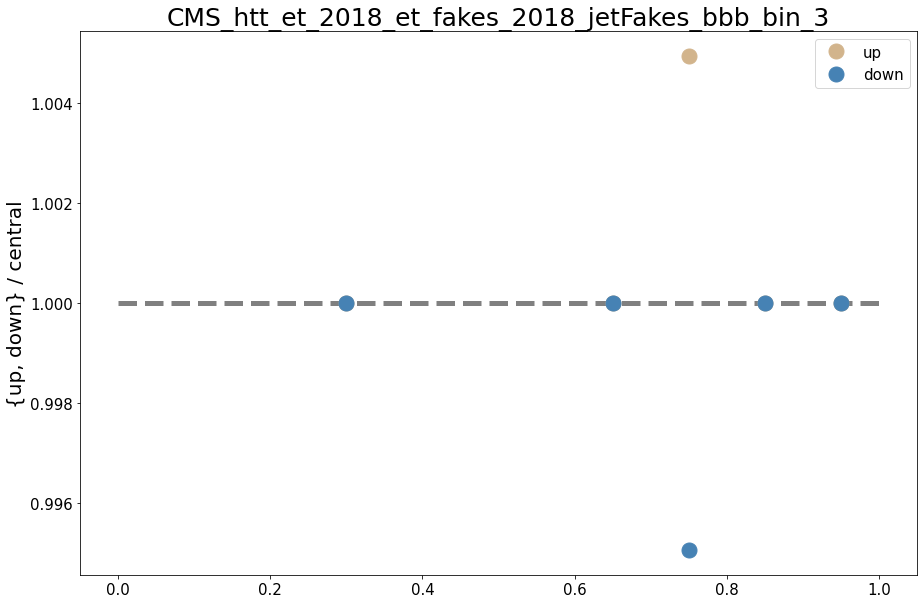

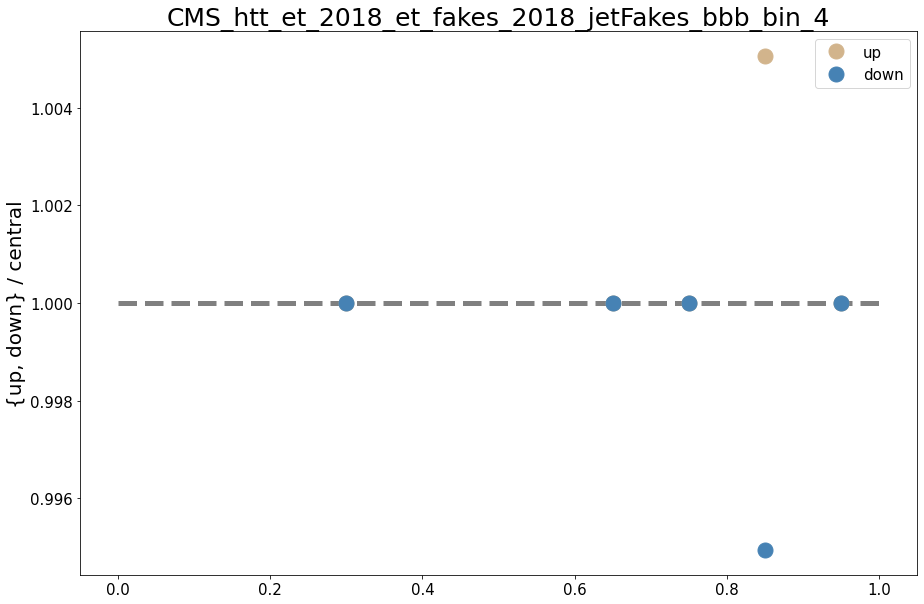

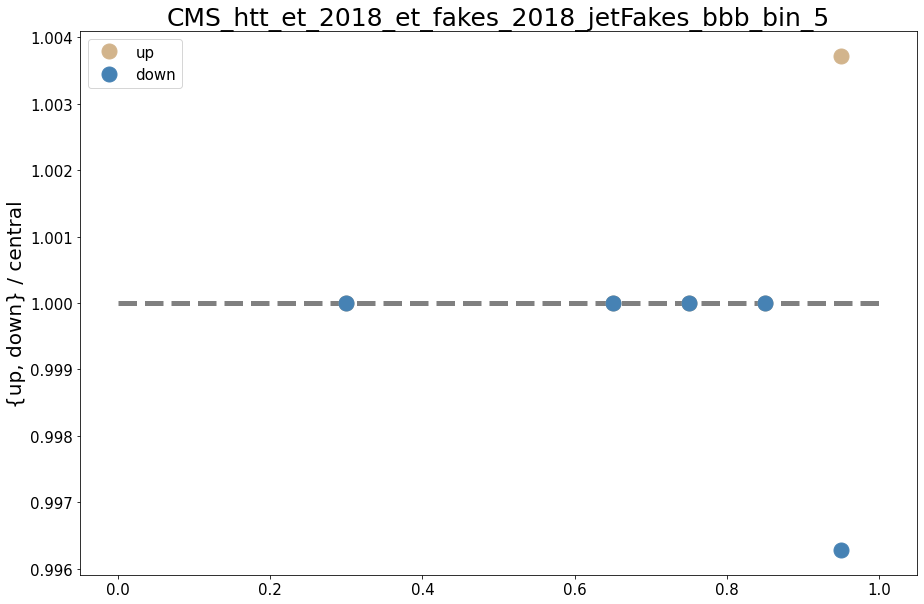

In [22]:
for syst_name in syst_list:
    explorer.set_templates(channel, decay_mode, category, sample, year, syst_name, template_folder_name='htt_et_2018_2_13TeV')
#     explorer.plot_var_shifts(out_plots_path='./systematics_plots/et_1Sept_datacards/', verbose=False, save_plot=False)
    explorer.plot_var_ratio_shifts(out_plots_path='./systematics_plots/et_1Sept_datacards/', verbose=True, save_plot=False)



Looking into systematic: ff_et_sub_syst
plotting up/down shifts for jetFakes template in category: et_fakes_2018




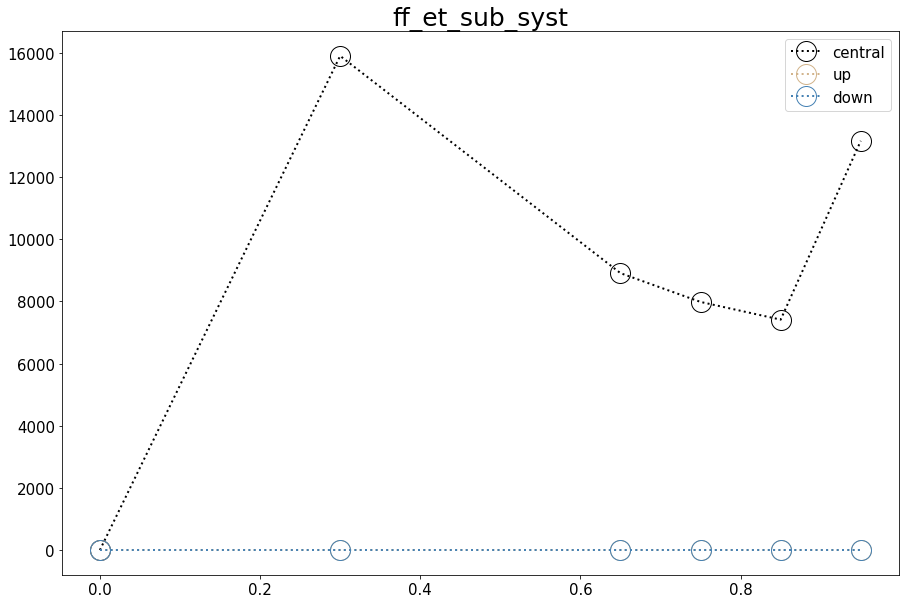

In [21]:
explorer.set_templates(channel, decay_mode, category, sample, year, 'ff_et_sub_syst')
#     explorer.plot_var_shifts(out_plots_path='./systematics_plots/et_1Sept_datacards/', verbose=False, save_plot=False)
explorer.plot_var_shifts(out_plots_path='./systematics_plots/et_1Sept_datacards/', verbose=True, save_plot=False)

In [15]:
explorer.data_file['et_fakes_2018/jetFakes_'].keys() # ff_et_qcd_stat_unc1_njets2_mvadm0_sig_gt

[b'data_obs;2',
 b'data_obs;1',
 b'EmbedZTT_CMS_ttbar_embeded_13TeVUp;1',
 b'EmbedZTT_CMS_ttbar_embeded_13TeVDown;1',
 b'EmbedZTT;1',
 b'EmbedZTT_CMS_scale_t_1prong_13TeVUp;1',
 b'EmbedZTT_CMS_scale_t_1prong_13TeVDown;1',
 b'EmbedZTT_CMS_scale_t_1prong1pizero_13TeVUp;1',
 b'EmbedZTT_CMS_scale_t_1prong1pizero_13TeVDown;1',
 b'EmbedZTT_CMS_scale_t_3prong_13TeVUp;1',
 b'EmbedZTT_CMS_scale_t_3prong_13TeVDown;1',
 b'EmbedZTT_CMS_scale_t_3prong1pizero_13TeVUp;1',
 b'EmbedZTT_CMS_scale_t_3prong1pizero_13TeVDown;1',
 b'EmbedZTT_CMS_scale_e_13TeVUp;1',
 b'EmbedZTT_CMS_scale_e_13TeVDown;1',
 b'EmbedZTT_CMS_eff_Xtrigger_mt_MVADM0_13TeVUp;1',
 b'EmbedZTT_CMS_eff_Xtrigger_mt_MVADM1_13TeVUp;1',
 b'EmbedZTT_CMS_eff_Xtrigger_mt_MVADM2_13TeVUp;1',
 b'EmbedZTT_CMS_eff_Xtrigger_mt_MVADM10_13TeVUp;1',
 b'EmbedZTT_CMS_eff_Xtrigger_mt_MVADM0_13TeVDown;1',
 b'EmbedZTT_CMS_eff_Xtrigger_mt_MVADM1_13TeVDown;1',
 b'EmbedZTT_CMS_eff_Xtrigger_mt_MVADM2_13TeVDown;1',
 b'EmbedZTT_CMS_eff_Xtrigger_mt_MVADM10_13TeVDow

In [28]:
explorer.data_file['et_fakes_2018/jetFakes_ff_et_sub_systDown'].values

array([0., 0., 0., 0., 0.])

### **tree & weight systematics**

In [85]:
systematic_to_vars = {
    
        'TauCheck_CMS_scale_e_13TeV'              : ('tree',
                                                [
                                                 'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
                                                 ],
                                                    None),
    
#     'TauCheck_CMS_scale_mu_13TeV'              : ('tree',
#                                                 [
#                                                  'pt_1', 
# #                                                  'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
# #                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
# #                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2',
#                                                  'acotautau_refitbs_00', 'acotautau_refitbs_01', 'acotautau_bs_00', 'acotautau_bs_01',
#                                                  'predicted_prob'
#                                                  ],
#                                                  None),
      
    'TauCheck_CMS_scale_t_1prong_13TeV'   : ('tree',
                                                 [
                                                 'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_RefitV_with_BS_1', 'IP_signif_RefitV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'                                                    
                                                    ],
                                             'dmMVA_2 == 0'
                                            ), 
    
    'TauCheck_CMS_scale_t_1prong1pizero_13TeV'   : ('tree',
                                                 [
                                                 'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'                                                    
                                                    ],
                                             'dmMVA_2 == 1'
                                             ),   
    
    'TauCheck_CMS_scale_t_3prong_13TeV'   : ('tree',
                                                 [
                                                 'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'                                                    
                                                    ],
                                             'dmMVA_2 == 10'
                                             ),  
    
#     'TauCheck_CMS_scale_j_Absolute_2016_13TeV'   : ('tree',
#                                                 [
# #                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
# #                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
# #                                                  'predicted_prob'
#                                                    ],
#                                                  None
#                                               ),

    'TauCheck_CMS_res_j_13TeV'               : ('tree',
                                                [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
                                                 'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'                                                    
                                                   ],
                                                None
                                               ),
    
#     'TauCheck_CMS_scale_met_unclustered_13TeV'   : ('tree',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ],
             
    'TauCheck_CMS_htt_ZLShape_1prong_13TeV'   : ('tree',
                                                [
                                                 'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
                                                   ], 
                                                'tau_decay_mode_2 == 0'), # 'gen_match_2 != 1 and gen_match_2 != 3'),

                 
#     'TauCheck_CMS_htt_ZLShape_1prong1pi_13TeV'   : ('tree',
#                                                 [
#                                                  'pt_1', 'pt_2', #'m_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
# #                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
# #                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
# #                                                  'predicted_prob'
#                                                    ], 
#                                                 'tau_decay_mode_2 == 1'), # 'gen_match_2 != 1 and gen_match_2 != 3'),
    
    
    'TauCheck_CMS_htt_boson_reso_met_13TeV'   : ('tree',
                                                 [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis',
                                                     'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
                                                   ],
                                                 None
                                                ),   
    
    'TauCheck_CMS_htt_boson_scale_met_13TeV'   : ('tree',
                                                 [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 
                                                     'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
                                                   ],
                                                  None
                                                 ),    

#     'weight_CMS_htt_dyShape_13TeV'   : ('weight',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ]), 
 
#     'weight_CMS_eff_Xtrigger_mt_MVADM0_13TeV'   : ('weight',
#                                              [
#                                              'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                              'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                              'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                              'predicted_prob'
#                                                ]), 

#     'weight_CMS_eff_t_pTlow_MVADM0_13TeV'   : ('weight',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ]),   

#     'weight_CMS_htt_ttbarShape_13TeV'   : ('weight',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ]), 
    
#     'weight_ff_mt_wjets_stat_njets0_mvadm1'   : ('weight',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ]),     
    
        
    'weight_CMS_eff_Xtrigger_et_MVADM0_13TeV'   : ('weight',
                                                 [
                                                 'trg_etaucross',
                                                 'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', #'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
                                                   ],
                                                 'dmMVA_2 == 0'
                                                ),    
    
#         'weight_CMS_eff_Xtrigger_mt_MVADM10_13TeV'   : ('weight',
#                                                  [
#                                                  'trg_mutaucross',
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
# #                                                  'predicted_prob'
#                                                    ],
#                                                  'dmMVA_2 == 10'), 
    
#         'weight_CMS_eff_Xtrigger_mt_MVADM1_13TeV'   : ('weight',
#                                                  [
#                                                  'trg_mutaucross',
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
# #                                                  'predicted_prob'
#                                                    ],
#                                                  'dmMVA_2 == 1'), 
    
}

In [93]:
var_to_range_nbins = {
                    'acotautau_refitbs_00': ([0, 2*np.pi], 20),
                    'acotautau_refitbs_01': ([0, 2*np.pi], 20),
                    'acotautau_bs_00': ([0, 2*np.pi], 20),
                    'acotautau_bs_01': ([0, 2*np.pi], 20),
                    'zptweight': ([0, 1], 20),
    
                    'puppimet': ([0, 200], 20),
                    'puppimetphi': ([-3.15, 3.15], 20),
                    'puppimt_1': ([0, 60], 20),
    
                    'pt_tt': ([0, 200], 20),
                    'pt_1': ([20, 100], 10),
                    'pt_2': ([20, 100], 10),
    
                    'm_sv': ([0, 200], 20),
                    'm_fast': ([0, 200], 20),
                    'm_vis': ([0, 200], 20),
                    'mjj': ([0, 1000], 20),
                    'dijetpt': ([0, 800], 20),
                    'jdeta': ([-10, 10], 20),
                    'jpt_1': ([0, 200], 20),
                    'jpt_2': ([0, 100], 20),
                    'bpt_1': ([0, 200], 20),
                    'bpt_2': ([0, 200], 20),
                    'njets': ([0, 8], 8),
                    'nbtag': ([0, 4], 4), 
    
                    'predicted_class': ([0, 3], 3),
                    'predicted_prob': ([0, 1], 20),
    
                    'IP_signif_PV_with_BS_1': ([0, 10], 20),
                    'IP_signif_PV_with_BS_2': ([0, 10], 20),
    
                    'IP_signif_RefitV_with_BS_1': ([0, 10], 20),
                    'IP_signif_RefitV_with_BS_2': ([0, 10], 20),
    
                    'trg_mutaucross': ([0, 1], 2),
                    'trg_etaucross': ([0, 1], 2),
}


In [94]:
year = '2017'
sample = 'DY'

# path = '/nfs/dust/cms/user/rasp/storage/cardinia/2017/OutputDNNmt/June9-PAS/predictions_2017/mt-NOMINAL_ntuple_EMB.root'
path = f'/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/DesyTauAnalyses/NTupleMaker/test/CP_HTT/etau/{year}/{sample}_syst.root'
# path = '/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/DesyTauAnalyses/NTupleMaker/test/CP_HTT/etau/2018'

out_plots_path = f'/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/systematics_plots/et_test/{year}/{sample}'

In [95]:
explorer = SystExplorer(path)
explorer.set_central_tree('TauCheck')
weights = []
cut = None
# cut = 'eta_1 > -1000'
# cut = 'eta_1 < 1.558 and eta_1 > -1.558'
# cut = 'eta_1 > 1.558 or eta_1 < -1.558'

In [96]:
# explorer.print_file_content()

In [97]:
explorer.tree_central.keys()

[b'run',
 b'lumi',
 b'evt',
 b'npv',
 b'npu',
 b'rho',
 b'passedAllMetFilters',
 b'pt_1',
 b'pt_uncorr_1',
 b'phi_1',
 b'eta_1',
 b'chconst_1_pt',
 b'chconst_1_eta',
 b'chconst_1_phi',
 b'm_1',
 b'gen_match_1',
 b'q_1',
 b'iso_1',
 b'd0_1',
 b'dZ_1',
 b'ip0x_1',
 b'ip0y_1',
 b'ip0z_1',
 b'ipx_1',
 b'ipy_1',
 b'ipz_1',
 b'ipphi_1',
 b'ipeta_1',
 b'ipx_bs_1',
 b'ipy_bs_1',
 b'ipz_bs_1',
 b'ipphi_bs_1',
 b'ipeta_bs_1',
 b'gen_ipx_1',
 b'gen_ipy_1',
 b'gen_ipz_1',
 b'gen_ipphi_1',
 b'gen_ipeta_1',
 b'ip_covxx_1',
 b'ip_covxy_1',
 b'ip_covxz_1',
 b'ip_covyy_1',
 b'ip_covyz_1',
 b'ip_covzz_1',
 b'ipx_uncorr_1',
 b'ipy_uncorr_1',
 b'ipz_uncorr_1',
 b'ipx_bs_uncorr_1',
 b'ipy_bs_uncorr_1',
 b'ipz_bs_uncorr_1',
 b'IP_signif_PV_with_BS_1',
 b'IP_signif_PV_with_BS_uncorr_1',
 b'IP_signif_RefitV_with_BS_1',
 b'IP_signif_RefitV_with_BS_uncorr_1',
 b'ip_sig_1',
 b'detaip_1',
 b'dphiip_1',
 b'detaip_uncorr_1',
 b'dphiip_uncorr_1',
 b'mt_1',
 b'puppimt_1',
 b'tau_decay_mode_1',
 b'dm_1',
 b'dmMVA_1',


In [98]:
for systematic_name, (systematic_type, variables, cut) in systematic_to_vars.items():
    explorer.set_dataframes(variables=variables, systematic_name=systematic_name, systematic_type=systematic_type, weights=weights, cut=cut)
    for var_name in variables:
        var_range, nbins = var_to_range_nbins[var_name]
        explorer.plot_var_shifts(var_name, var_range, nbins, out_plots_path=out_plots_path, verbose=False, save_plot=True)
        explorer.plot_var_ratio_shifts(var_name, var_range, nbins, out_plots_path=out_plots_path, verbose=False, save_plot=True)

/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:214: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = counts_up / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:215: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = counts_down / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:214: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = counts_up / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:215: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = counts_down / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:214: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = counts_up / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:215: RuntimeWarning: invalid value encountered in true

## **detailed studies**

In [183]:
path = '/nfs/dust/cms/user/rasp/storage/cardinia/SynchNTuples/mutau_June2/2018/WminusHToTauTauUncorrDecays_M125.root'

In [193]:
systematic_tree_name = 'TauCheck_CMS_scale_t_1prong_13TeV'
variables = ['gen_match_1', 'gen_match_2', 'pt_1', 'pt_2'] 
var_name = 'pt_2'
var_range, nbins = ([20., 100.], 20)

In [194]:
explorer = SystExplorer(path)
explorer.set_central_tree('TauCheck')
explorer.set_dataframes(variables=variables, systematic_name=systematic_tree_name, systematic_type='tree', weights=None, cut=None)



Looking into systematic: TauCheck_CMS_scale_t_1prong_13TeV
plotting up/down shifts for variable: pt_2




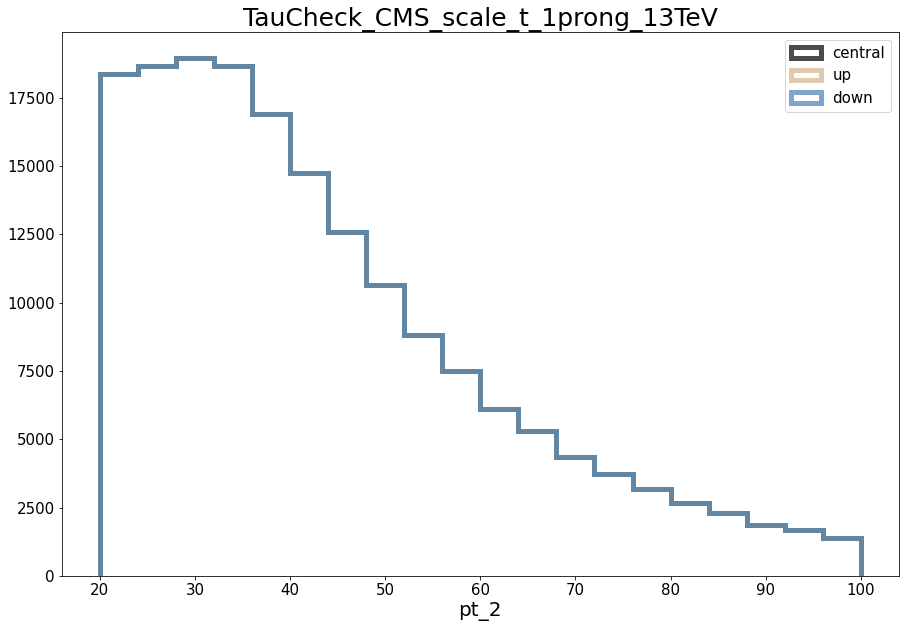

In [195]:
explorer.plot_var_shifts(var_name, var_range, nbins, out_plots_path=None, verbose=True, save_plot=False)



Looking into systematic: TauCheck_CMS_scale_t_1prong_13TeV
plotting up(down)/central ratio for variable: pt_2




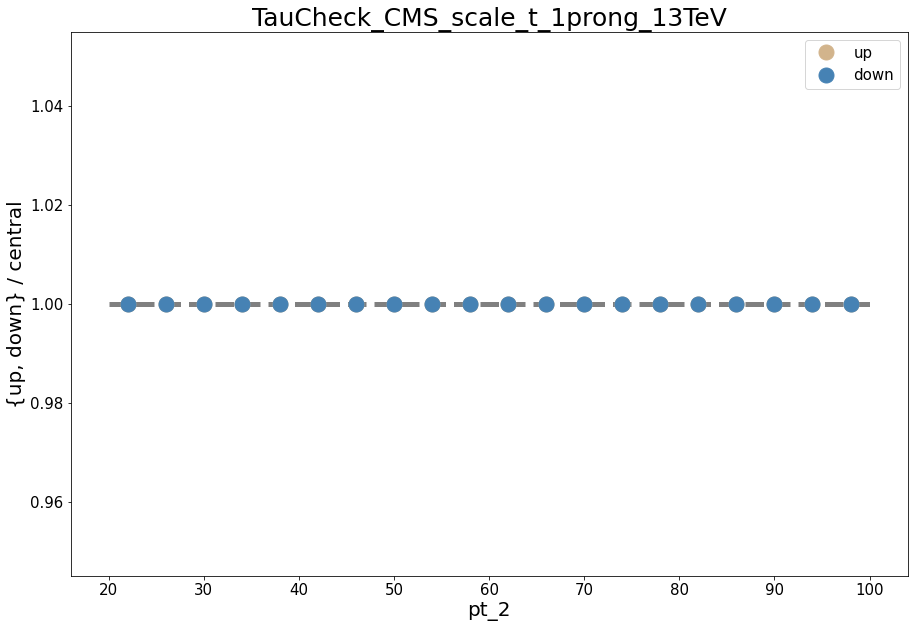

In [196]:
explorer.plot_var_ratio_shifts(var_name, var_range, nbins, out_plots_path=None, verbose=True, save_plot=False)

In [197]:
data = explorer.data_central

In [198]:
data.head()

,gen_match_1,pt_2,pt_1,gen_match_2
entry,,,,
0,4,29.982866,39.836727,5
1,4,32.796394,51.146442,5
2,4,38.241543,38.936756,5
3,4,69.659569,35.660053,5
4,4,31.994797,35.677155,5


In [199]:
np.unique(data.gen_match_2, return_counts=True)

(array([1, 2, 3, 4, 5, 6], dtype=int32),
 array([   516,      7,   1719,     11, 177470,  12594]))